<a href="https://colab.research.google.com/github/vinicioalmeida/descriptive/blob/main/retornorisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retorno e risco

Carregando as bibliotecas

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import datetime
import pandas_datareader.data as web   #pandas-datareader
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML   #ipython
display(HTML("<style>.container { width:100% !important; }</style>"))
import statsmodels.api as sm

Especificando datas e Ibovespa

In [ ]:
# Datas
start = datetime.datetime(2001, 1, 2)
end = datetime.datetime(2023, 10, 9)

## Ibovespa
bvsp = web.get_data_yahoo('^BVSP',start,end)

# Visualizando datas específicas
bvsp.head(3)
bvsp.tail(3)
bvsp.loc['2023-05-22']
bvsp.loc['2023-06-01':'2023-06-16']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,108339.00,110745.00,108335.00,110565.00,110565.00,14669000
2023-06-02,110568.00,113070.00,110567.00,112558.00,112558.00,14545800
2023-06-05,112558.00,113071.00,111736.00,112696.00,112696.00,9078800
2023-06-06,112697.00,114783.00,112696.00,114610.00,114610.00,15025400
2023-06-07,114610.00,115978.00,114610.00,115488.00,115488.00,14017100
2023-06-09,115489.00,117603.00,115489.00,117019.00,117019.00,13527100
2023-06-12,117022.00,117735.00,116704.00,117336.00,117336.00,12016200
2023-06-13,117337.00,117924.00,116363.00,116743.00,116743.00,12392200
2023-06-14,116753.00,119085.00,116745.00,119069.00,119069.00,16938600


Visualizando os preços

Text(0.5, 1.0, 'Ibovespa - Preço')

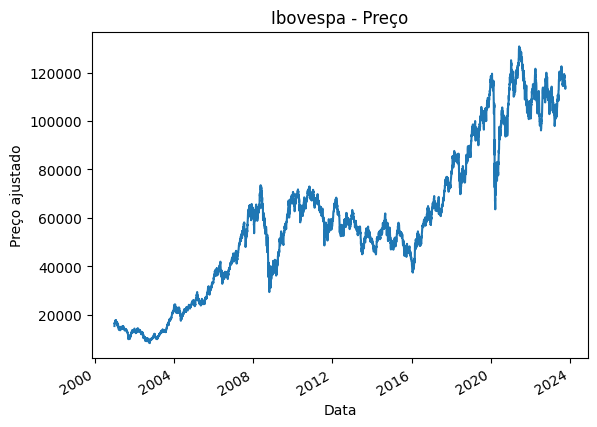

In [ ]:
bvsp['Adj Close'].plot()
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.title("Ibovespa - Preço")

Calculando retornos diários e mensais

In [ ]:
bvsp_daily_returns = bvsp['Adj Close'].pct_change()
bvsp_monthly_returns = bvsp['Adj Close'].resample('M').ffill().pct_change()

Visualizando os retornos diários

Text(0.5, 1.0, 'Ibovespa - Retornos Diários')

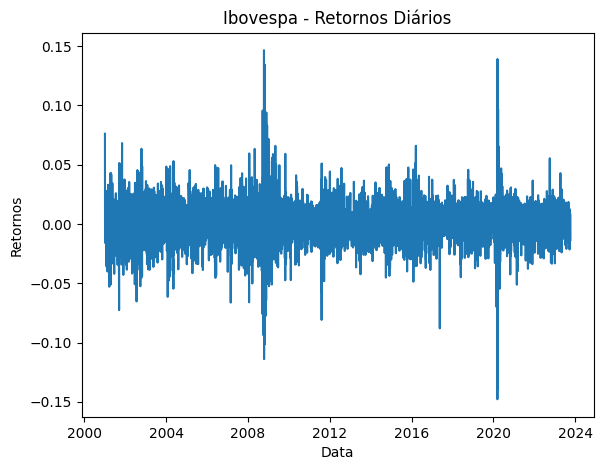

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bvsp_daily_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retornos")
ax1.set_title("Ibovespa - Retornos Diários")

Visualizando os retornos mensais

Text(0.5, 1.0, 'Ibovespa - Retornos mensais')

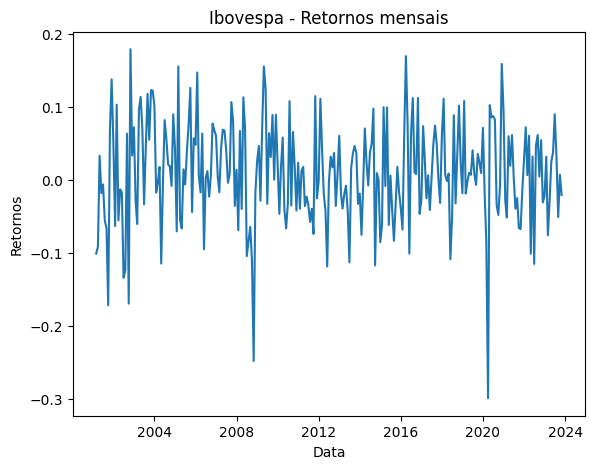

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bvsp_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retornos")
ax1.set_title("Ibovespa - Retornos mensais")

O histograma dos retornos diários

Text(0.5, 1.0, 'Ibovespa - Retornos Diários')

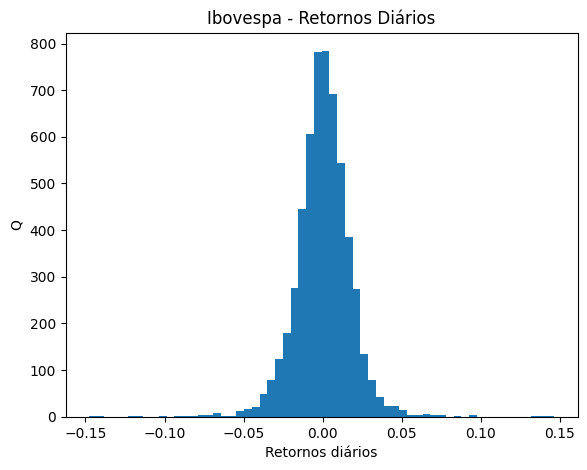

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
bvsp_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Retornos diários")
ax1.set_ylabel("Q")
ax1.set_title("Ibovespa - Retornos Diários")

Vejamos o mesmo tratamento, agora para uma ação qualquer

In [ ]:
# Ação
acao = web.get_data_yahoo('BRFS3.SA',start,end)

# Visualizando datas específicas
acao.head(3)
acao.tail(3)
acao.loc['2023-05-22']
acao.loc['2023-06-01':'2023-06-16']

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,8.16,8.61,8.14,8.47,8.47,36615300
2023-06-02,8.64,8.87,8.20,8.59,8.59,26081300
2023-06-05,8.56,8.76,8.39,8.65,8.65,14080900
2023-06-06,8.61,8.88,8.48,8.66,8.66,18132700
2023-06-07,8.69,8.83,8.51,8.71,8.71,11152000
2023-06-09,8.74,8.89,8.68,8.83,8.83,11497100
2023-06-12,8.88,9.04,8.70,8.87,8.87,9844100
2023-06-13,8.89,9.13,8.73,8.84,8.84,12997900
2023-06-14,8.90,9.19,8.84,9.14,9.14,19675000


Plot dos preços

Text(0.5, 1.0, 'Ação - Preço')

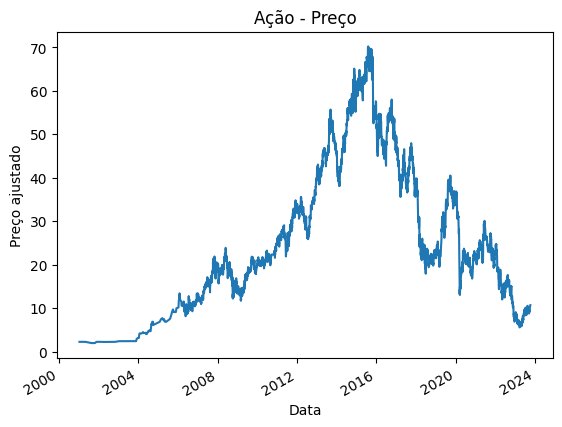

In [ ]:
acao['Adj Close'].plot()
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.title("Ação - Preço")

Cálculo dos retornos diários e mensais

In [ ]:
acao_daily_returns = acao['Adj Close'].pct_change()
acao_monthly_returns = acao['Adj Close'].resample('M').ffill().pct_change()

Plot dos retornos diários

Text(0.5, 1.0, 'Ação - Retornos Diários')

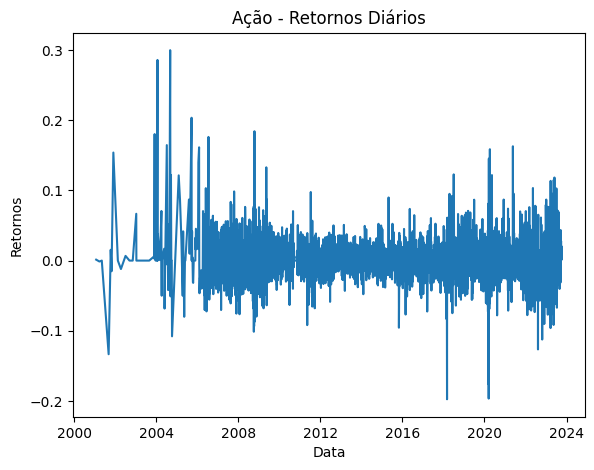

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(acao_daily_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retornos")
ax1.set_title("Ação - Retornos Diários")

Plot dos retornos mensais

Text(0.5, 1.0, 'Ação - Retornos Mensais')

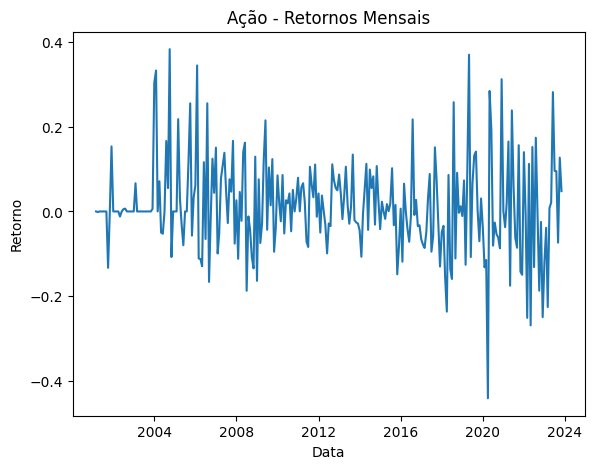

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(acao_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("Ação - Retornos Mensais")

Plot do histograma

Text(0.5, 1.0, 'Ação - Retornos Diários')

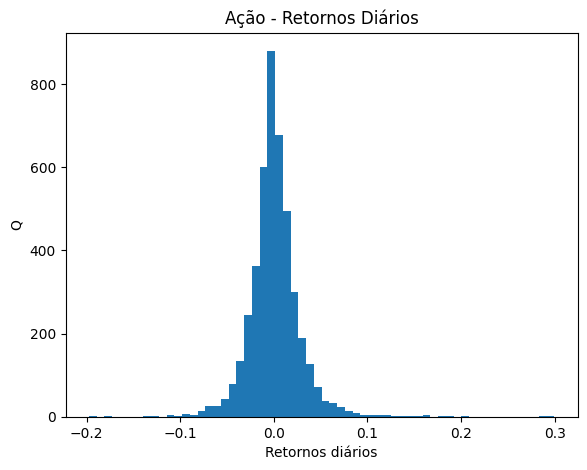

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
acao_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Retornos diários")
ax1.set_ylabel("Q")
ax1.set_title("Ação - Retornos Diários")

## Modelo linear de um fator - inspirado no CAPM

Primeiro um plot

Text(0.5, 1.0, 'Scatter Plot Ação x Ibovespa')

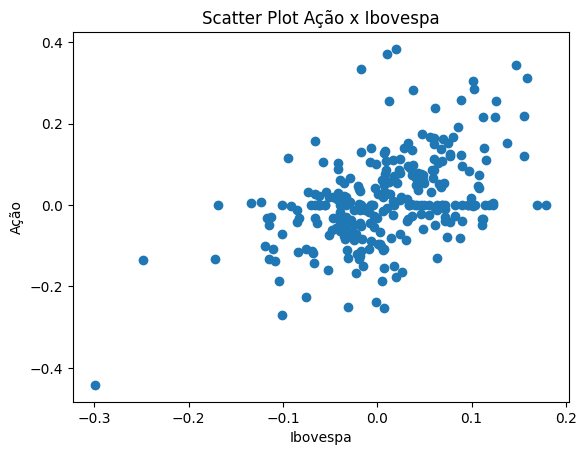

In [ ]:
ibovret = bvsp_monthly_returns.fillna(method='ffill')
acaoret = acao_monthly_returns.fillna(method='ffill')

plt.scatter(ibovret, acaoret)
plt.xlabel('Ibovespa')
plt.ylabel('Ação')
plt.title('Scatter Plot Ação x Ibovespa')

Preparando a regressão linear simples

In [ ]:
premio = ibovret - ((1+0.125783)**(1/252)-1)    # Fazendo premio = (Rm-Rf)

df = pd.DataFrame({'Acao': acaoret, 'Premio': premio})
df = df.fillna(method='bfill')

Premio = sm.add_constant(df['Premio'])  # Modelo com constante(intercepto)

Finalmente, a regressão

In [ ]:
model = sm.OLS(df['Acao'], Premio).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Acao   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     76.58
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.27e-16
Time:                        14:47:43   Log-Likelihood:                 249.33
No. Observations:                 274   AIC:                            -494.7
Df Residuals:                     272   BIC:                            -487.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.006      0.919      0.3